# 11-Total Shots vs Shots on target

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from PIL import Image
import urllib
import os

In [4]:
# Read CSV as DataFrame called airline_bumping
liga = pd.read_csv("/Users/ligandrosy/Downloads/a.csv")


In [5]:
liga

,Squad,Sh,SoT,SoT%
0,Arsenal,104,34,32.7
1,Aston Villa,56,17,30.4
2,Bournemouth,34,13,38.2
3,Brentford,76,29,38.2
4,Brighton,79,24,30.4
5,Chelsea,69,21,30.4
6,Crystal Palace,67,28,41.8
7,Everton,77,28,36.4
8,Fulham,64,21,32.8
9,Leeds United,79,28,35.4


## FBREF CODES

In [6]:
codes = { "Liverpool" :8650,  "Manchester City" :  8456,"Arsenal" :9825, "Tottenham" :  8586, "Brighton" :10204,
                      "Leeds United" :8463,
                     "Chelsea" :8455,
                  "Brentford" :9937,
           "Newcastle Utd" :10261,
                     "Fulham" :9879, "Crystal Palace" :9826,
          "Manchester Utd" :10260,
                     "Everton" :8668,
                 "Southampton":8466,
                 "Aston Villa" :10252,
          "Nott'ham Forest":10203,
   "Wolves":8602,
                    "West Ham" :8654,
                   "Leicester City" : 8197,
               "Bournemouth" :8678}

In [7]:
clubs = []

In [8]:
clubs = []
for x in (liga["Squad"]):
    if x in codes:
        clubs.append(codes[x])
        

In [9]:
liga["code"] =  clubs


In [10]:
liga["index"] = [i for i in range(1,21)]
liga.set_index("index")
liga = liga.sort_values(by = "Sh", ascending = False)

In [11]:
liga.set_index("index")

,Squad,Sh,SoT,SoT%,code
index,,,,,
12,Liverpool,118,39,33.1,8650
1,Arsenal,104,34,32.7,9825
13,Manchester City,103,36,35.0,8456
18,Tottenham,93,35,37.6,8586
15,Newcastle Utd,89,26,29.2,10261
10,Leeds United,79,28,35.4,8463
5,Brighton,79,24,30.4,10204
8,Everton,77,28,36.4,8668
20,Wolves,76,19,25.0,8602


In [12]:
clubs =liga["code"] 

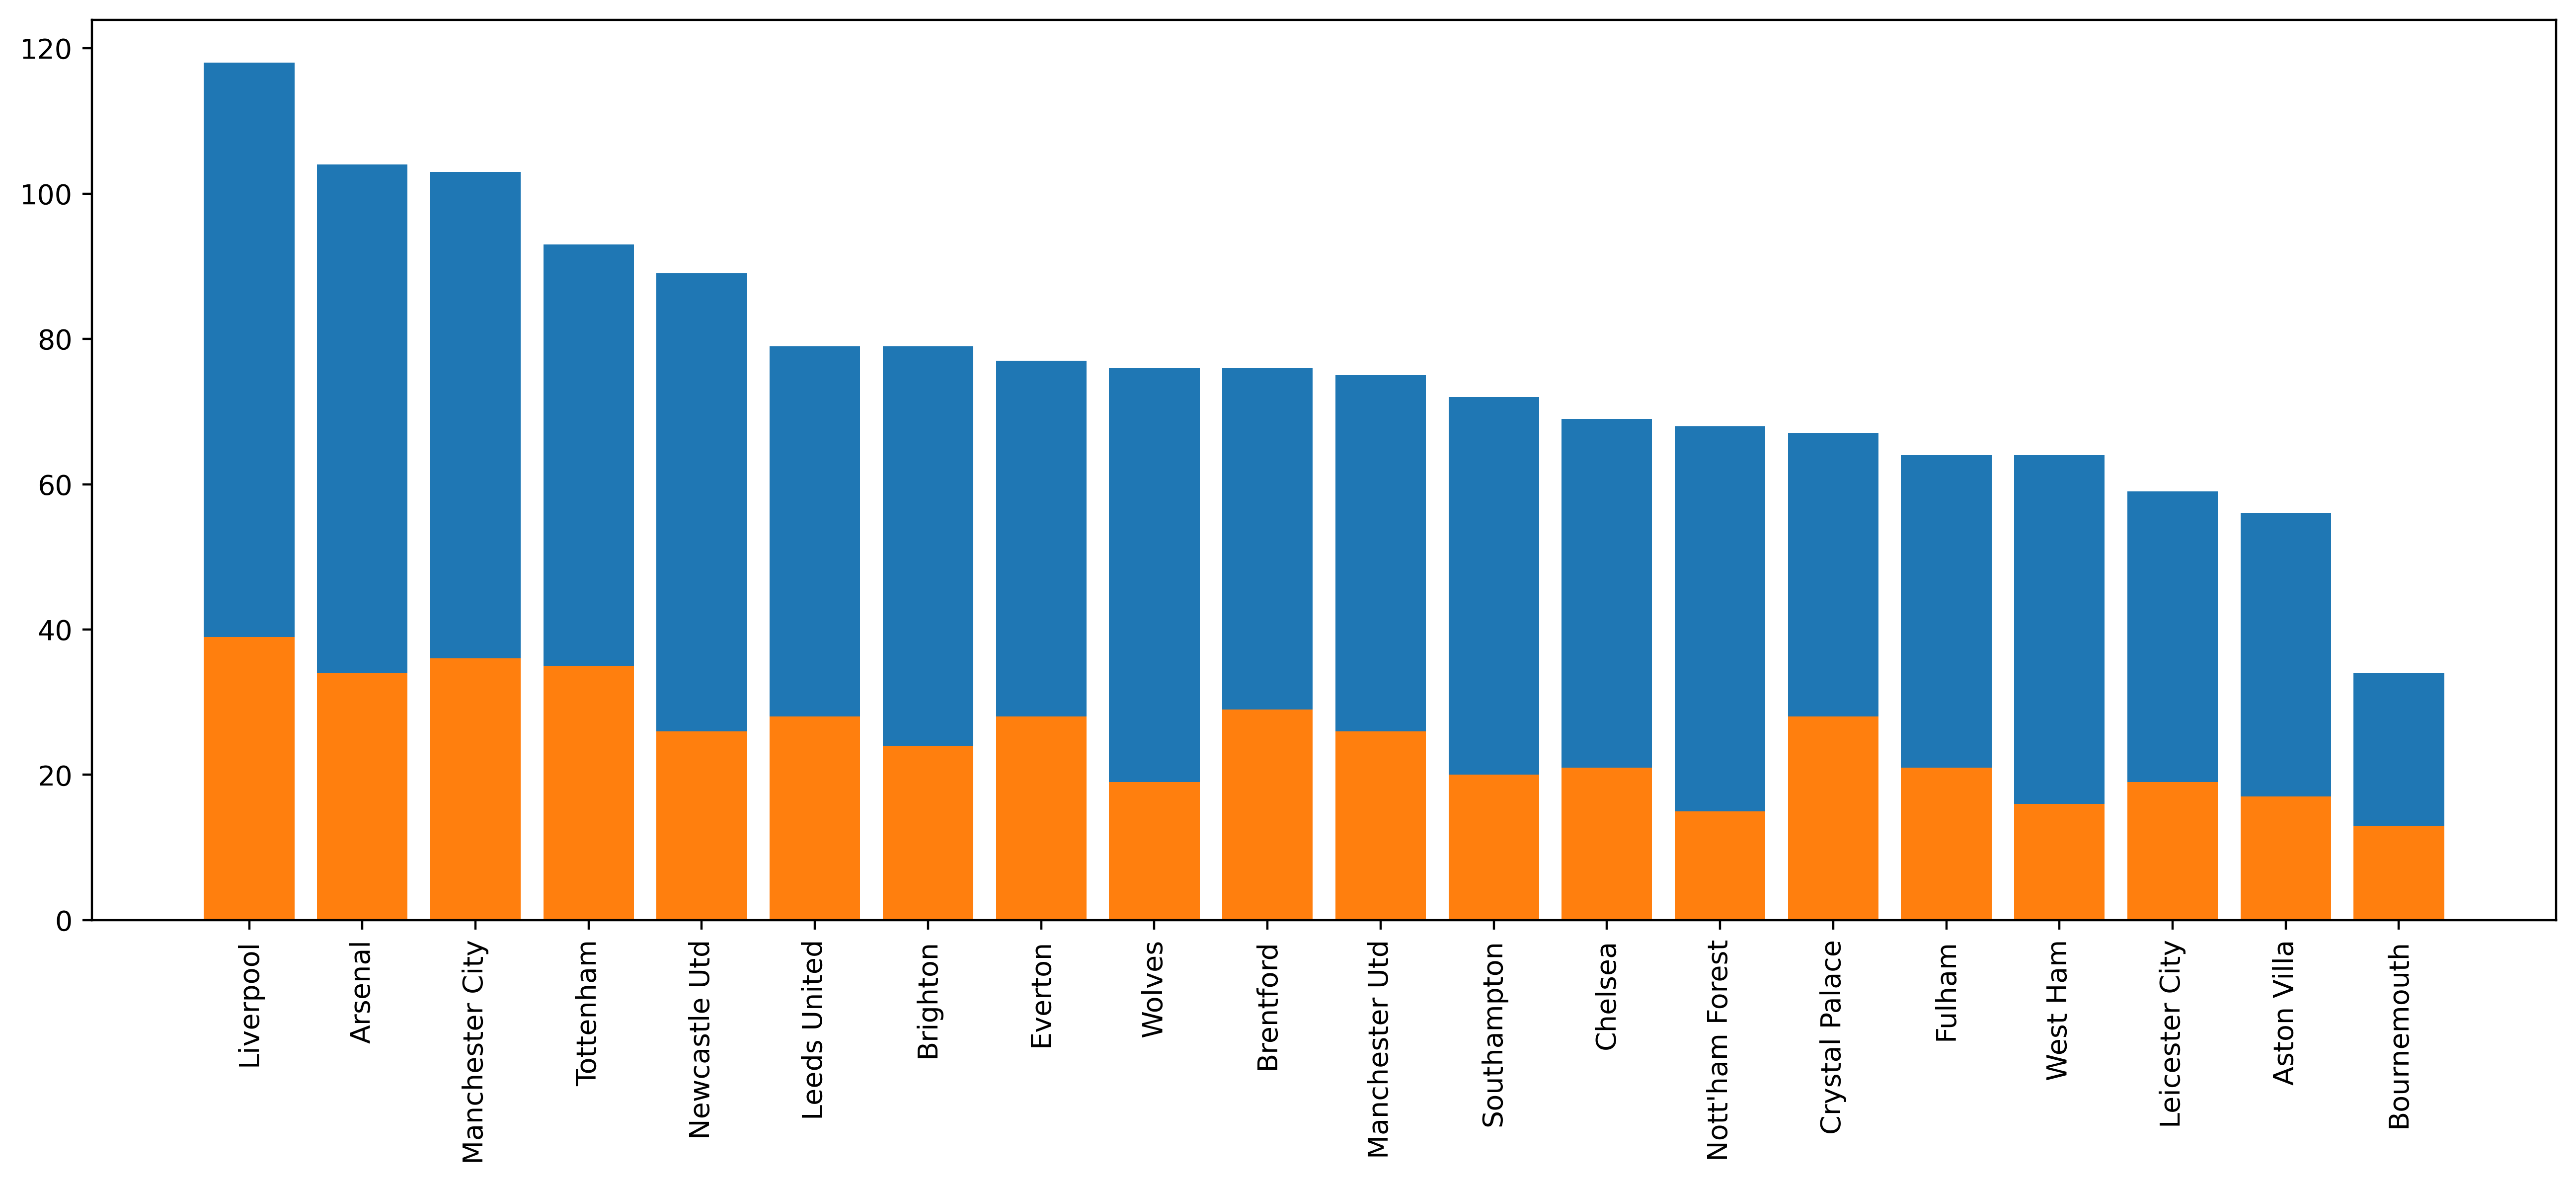

In [13]:
fig = plt.figure(figsize=(16, 6), dpi = 400)
ax = plt.subplot(111)

ax.bar(liga["Squad"],liga["Sh"])
ax.bar(liga["Squad"],liga["SoT"])
# Adjust ticks
ax.tick_params(axis = "x", rotation = 90)

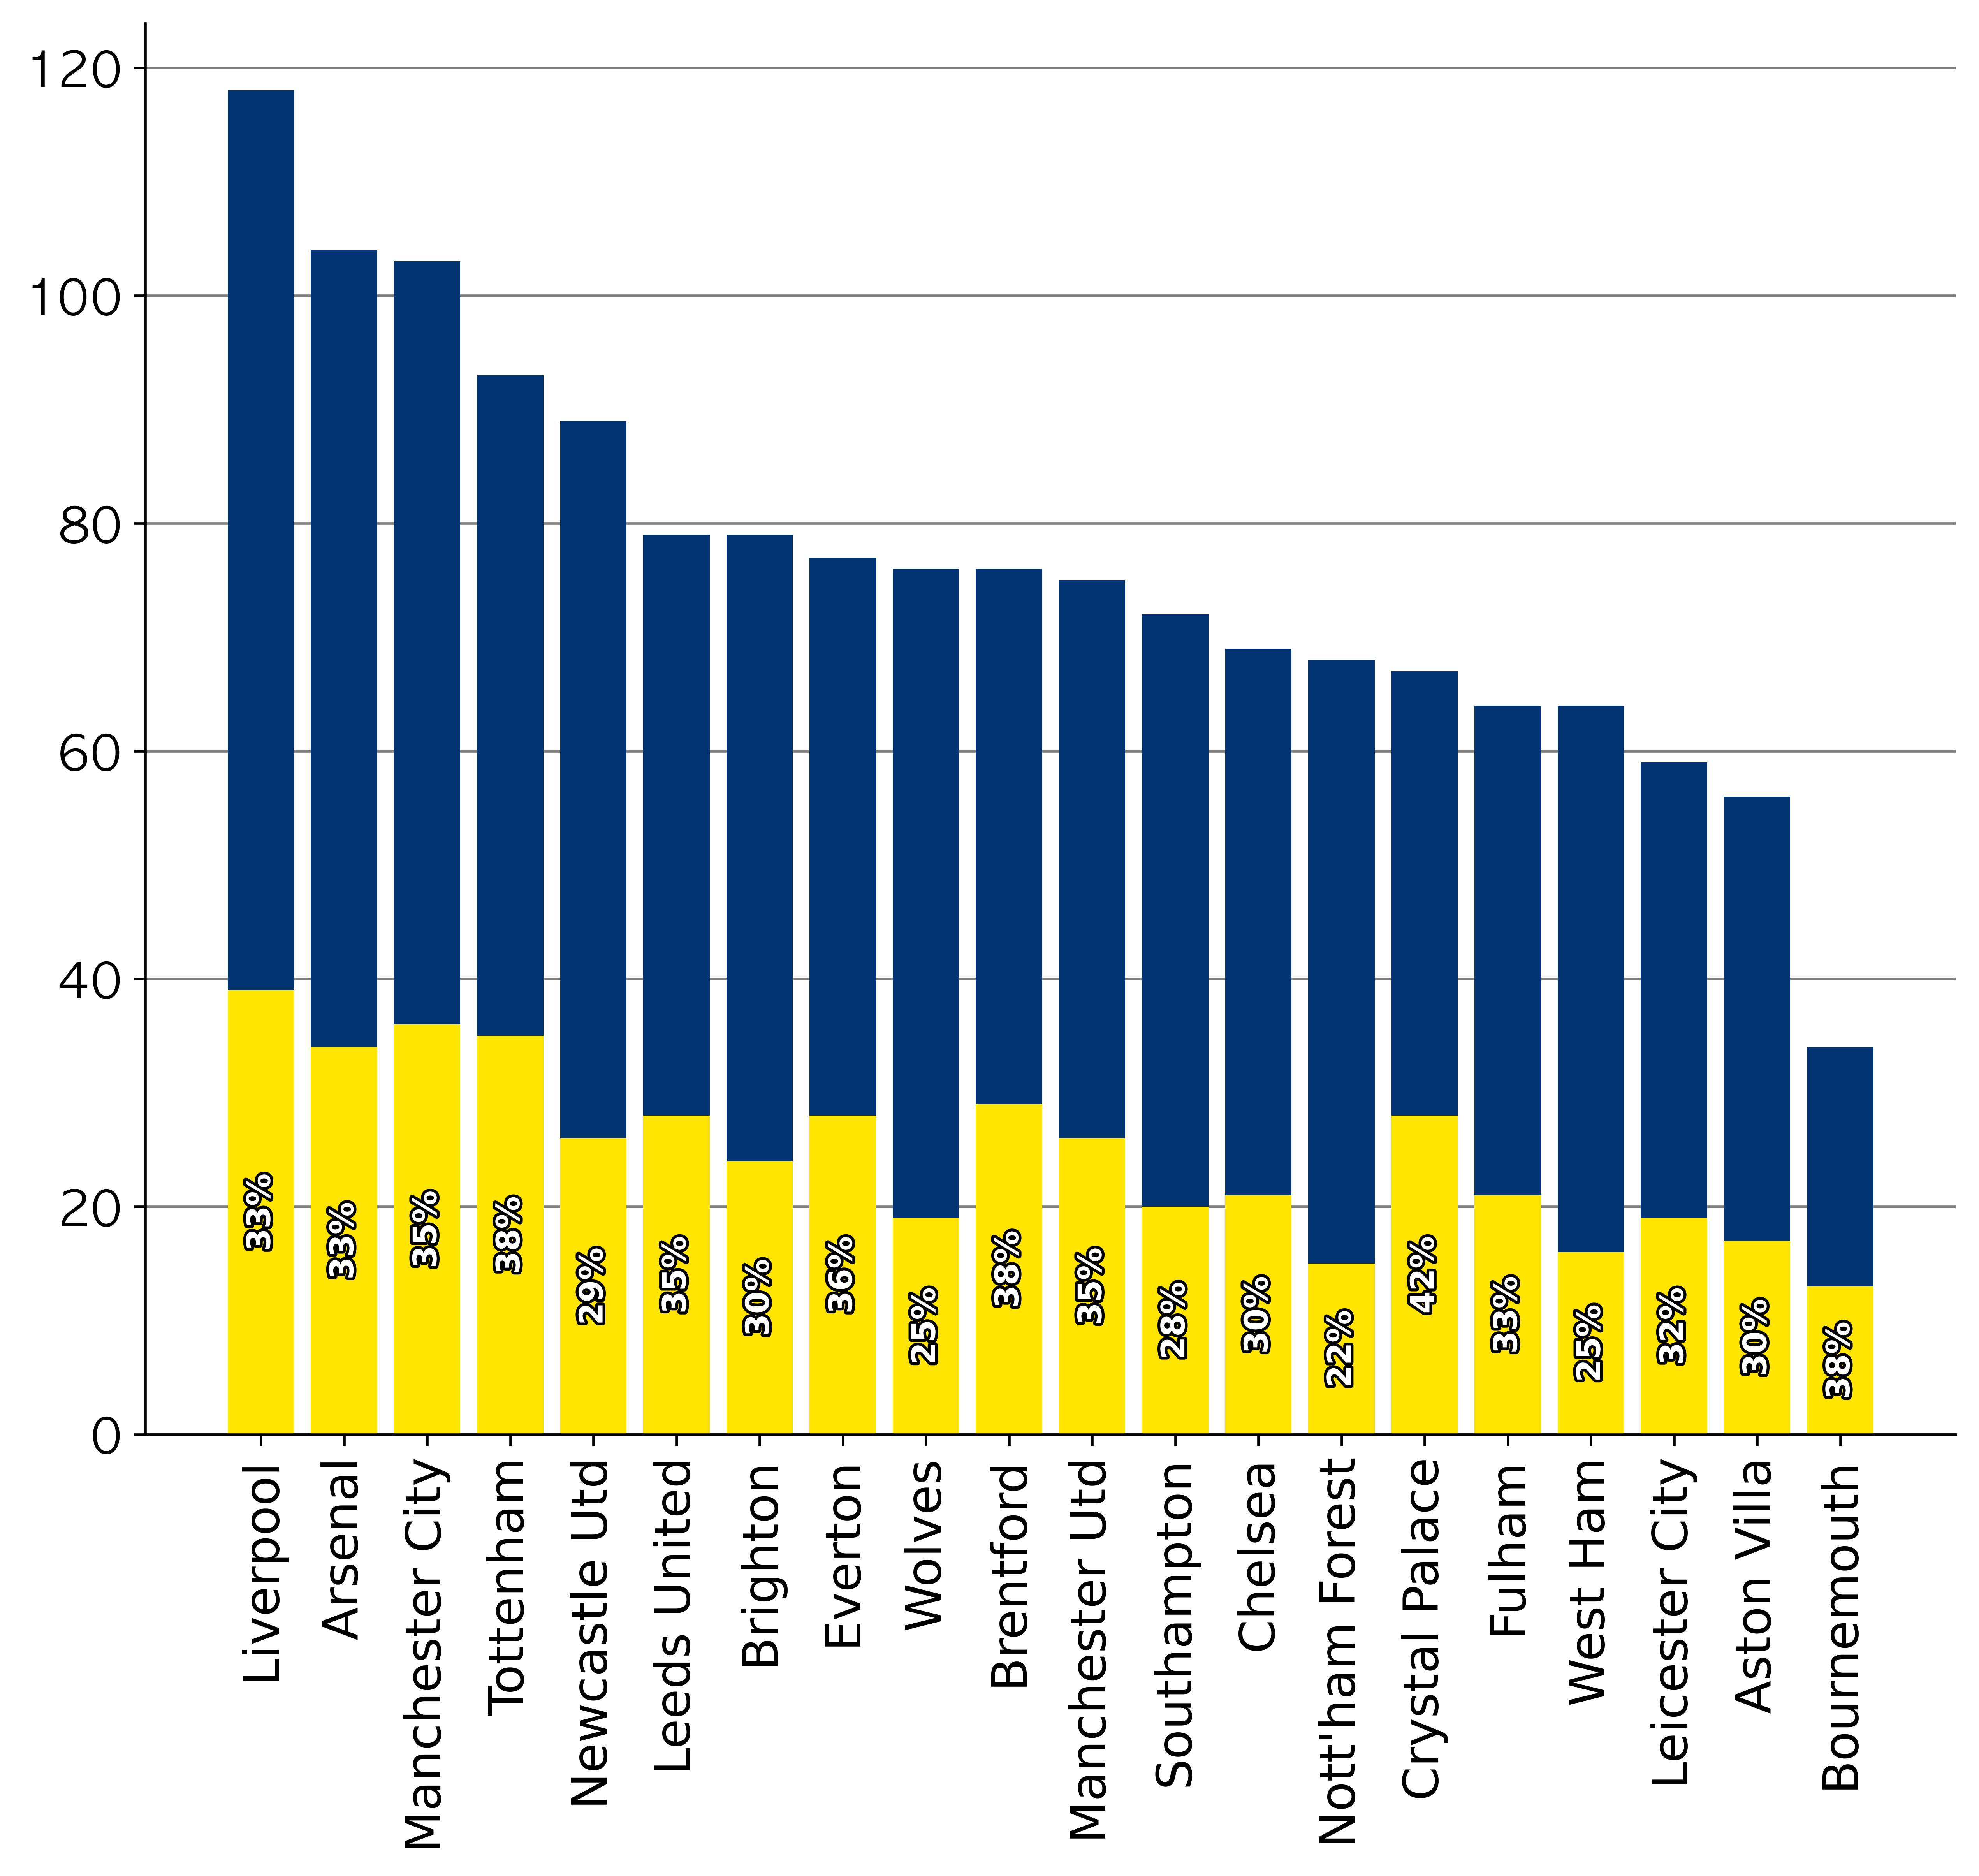

In [15]:
fig = plt.figure(figsize=(10, 8), dpi = 600)
ax = plt.subplot(111)

# Add spines
ax.spines["top"].set(visible = False)   #spines removes the plot edges(border)
ax.spines["right"].set(visible = False)

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='-')

ax.bar(liga["Squad"],liga["Sh"],color="#023474")
ax.bar(liga["Squad"],liga["SoT"],color="#FFE500")

# Adjust ticks
ax.tick_params(axis = "x", rotation = 90)
ax.tick_params(labelsize=15)

plt.yticks(fontname = "AppleGothic")

#Add percentage
aux_counter = 0
for y_h, y_a in zip(liga["Sh"], liga["SoT"]):

    away_text = ax.annotate(
        xy = (aux_counter, y_a/2), # Notice the sum of the bottom data.
        text = f"{y_a/y_h :.0%}",
        size = 10,
        ha = "center",
        va = "center",
        weight = "bold",
        color = "white",
        rotation = 90
    )
    
    away_text.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
    )

    aux_counter += 1

fig.savefig("AFC VS ARS.jpg")

In [17]:
liga = liga.sort_values(by = "Sh")

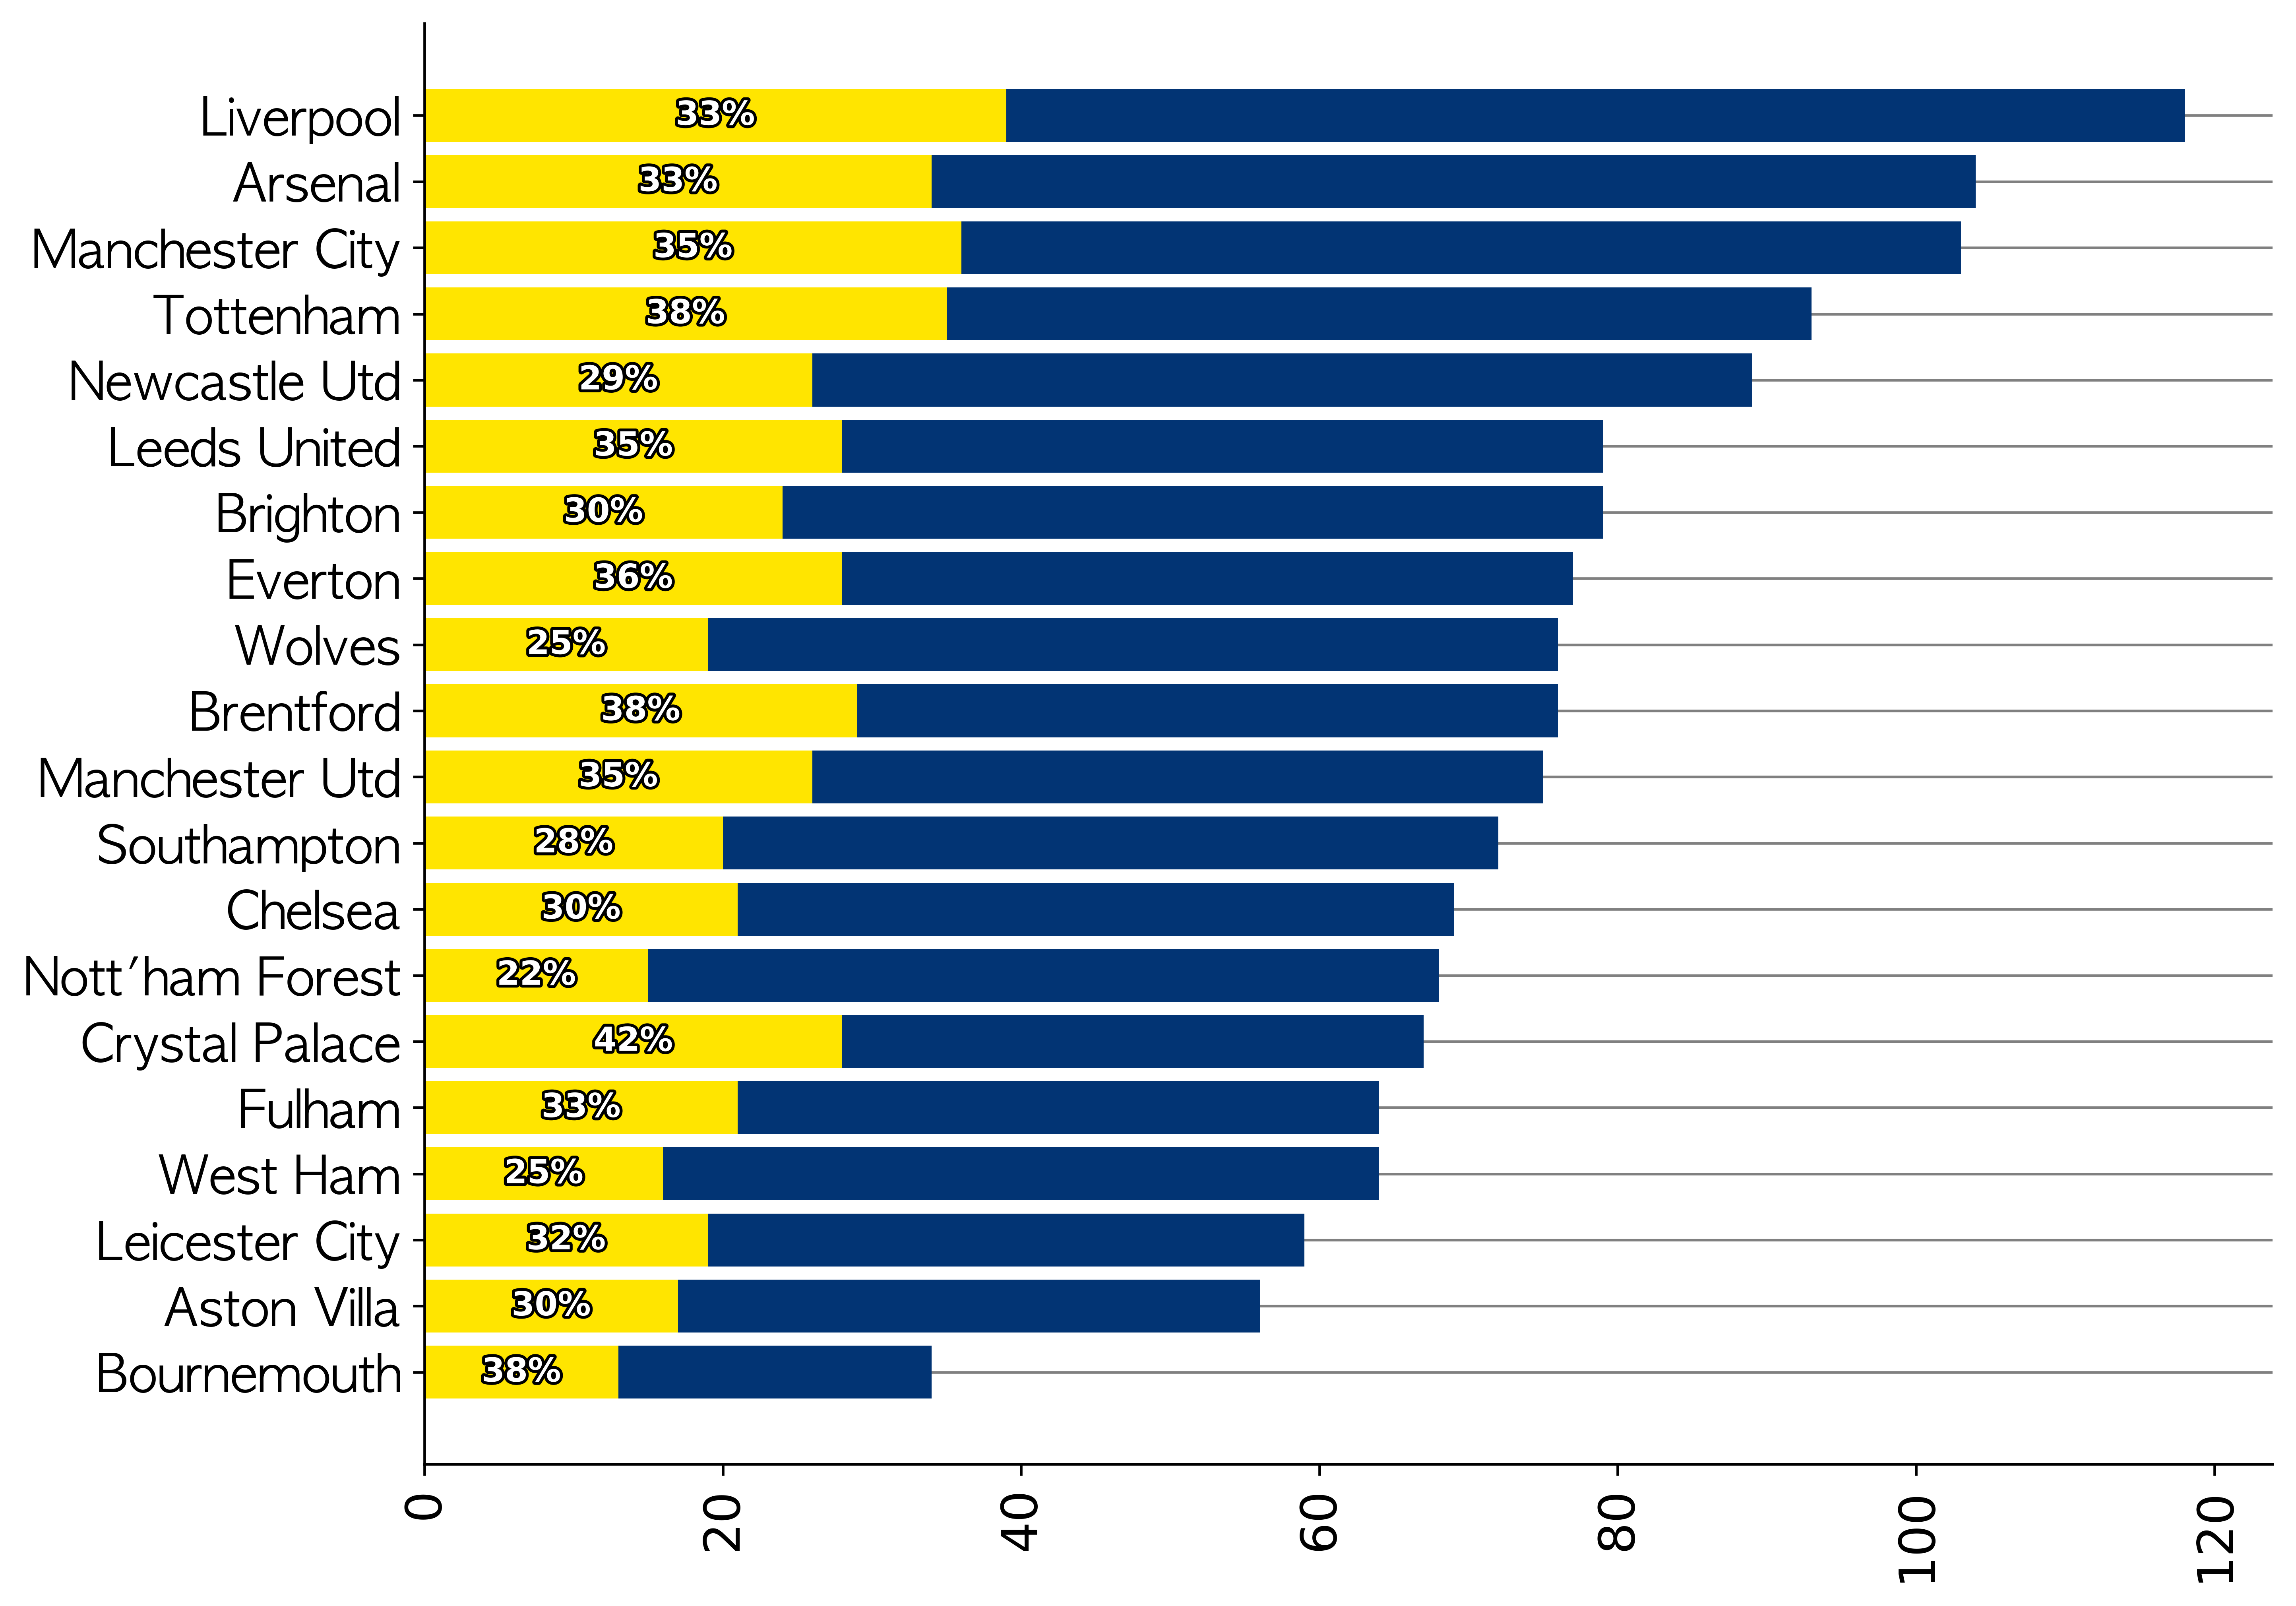

In [19]:
fig = plt.figure(figsize=(10, 8), dpi = 600)
ax = plt.subplot(111)

# Add spines
ax.spines["top"].set(visible = False)   #spines removes the plot edges(border)
ax.spines["right"].set(visible = False)

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='-')
ax.barh(liga["Squad"],liga["Sh"],color="#023474")
ax.barh(liga["Squad"],liga["SoT"],color="#FFE500")

# Adjust ticks
ax.tick_params(axis = "x", rotation = 90)
ax.tick_params(labelsize=15)

plt.yticks(fontname = "AppleGothic")

#Add percentage
aux_counter = 0
index =0
for y_h, y_a in zip(liga["Sh"], liga["SoT"]):

    away_text = ax.annotate(
        xy = (y_a/2,aux_counter), # Notice the sum of the bottom data.
        text = f"{y_a/y_h :.0%}",
        size = 10,
        ha = "center",
        va = "center",
        weight = "bold",
        color = "white",
        rotation = 0
    )
    
    away_text.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
    )

    aux_counter += 1

fig.savefig("AFC VS ARS.jpg")